In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, InputLayer
import tensorflow as tf

In [4]:
def plot_sine_function(frm, to, num_pts):
    """
    Function to plot 'sine' function using
    frm , to and num_pts arguments
    """
    
    x = np.linspace(start = frm, stop = to, num = num_pts)
    # x.shape

    y = np.sin(x)


    fig=plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')
    
    plt.plot(x, y, label = 'sine function')
    # plt.plot(x, np.cos(x), label = 'cosine function')

    plt.title("sine function")
    plt.grid()
    plt.legend(loc = 'upper right')
    plt.show()

    return None

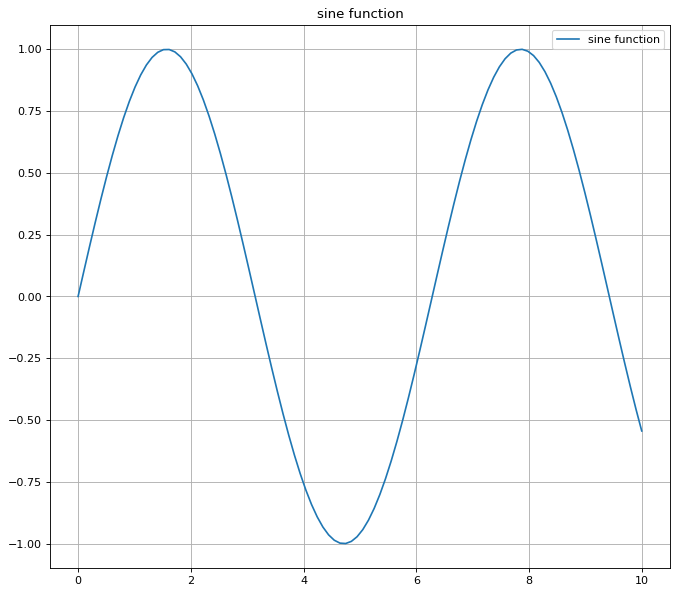

In [5]:
plot_sine_function(0, 10, 100)

In [6]:
# Create training data-
x = np.linspace(start = -2, stop = 20, num = 50000)

In [7]:
# sine function-
y = np.sin(x)

In [8]:
x.shape, y.shape

((50000,), (50000,))

In [12]:
# Reshape data-
x = x.reshape(-1, 1)

In [13]:
x.shape

(50000, 1)

In [21]:
tf.__version__

'2.0.0'

In [26]:
# Design neural network:

model = Sequential()
# model.add(InputLayer(input_shape = 1))
# model.add(Dense(4, input_dim = x.shape[1], activation = 'relu', kernel_initializer = tf.initializers.GlorotUniform()))
model.add(Dense(4, input_dim = x.shape[1], kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

"""
model.add(Dense(10, activation='relu', kernel_initializer = tf.initializers.GlorotUniform()))
model.add(Dense(10, activation='relu', kernel_initializer = tf.initializers.GlorotUniform()))
model.add(Dense(10, activation='relu', kernel_initializer = tf.initializers.GlorotUniform()))
model.add(Dense(1, activation = 'linear'))
"""

"\nmodel.add(Dense(10, activation='relu', kernel_initializer = tf.initializers.GlorotUniform()))\nmodel.add(Dense(10, activation='relu', kernel_initializer = tf.initializers.GlorotUniform()))\nmodel.add(Dense(10, activation='relu', kernel_initializer = tf.initializers.GlorotUniform()))\nmodel.add(Dense(1, activation = 'linear'))\n"

In [27]:
# Compile designed model-
model.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics = ['mae']
)

In [ ]:
# Train model-
history = model.fit(x, y, epochs = 100, batch_size=32)

In [31]:
history.history.keys()

dict_keys(['loss', 'mae'])

In [37]:
len(history.history['loss']), len(history.history['mae'])

(100, 100)

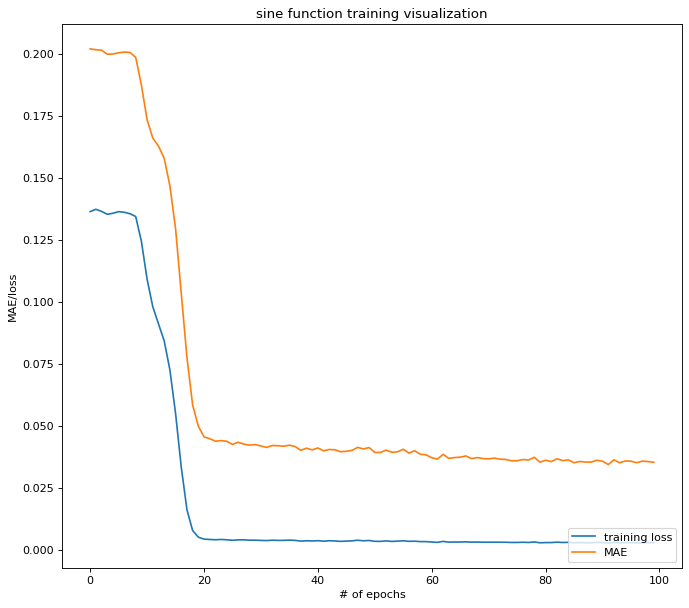

In [38]:
# Visualize training-
fig=plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['mae'], label = 'MAE')

plt.title("sine function training visualization")
plt.xlabel('# of epochs')
plt.ylabel('MAE/loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [33]:
# Make predictions using trained model-
y_pred = model.predict(x, batch_size = 32)

In [42]:
y.shape, y_pred.shape

((50000,), (50000, 1))

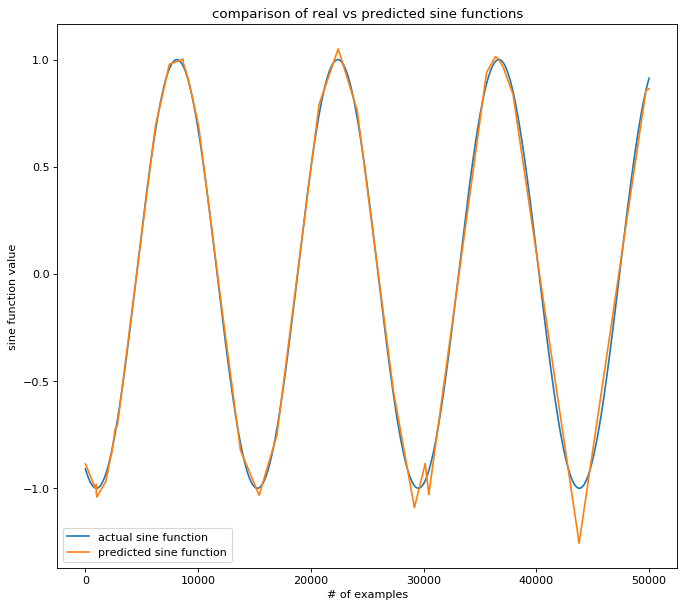

In [43]:
fig=plt.figure(figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(y, label = 'actual sine function')
plt.plot(y_pred, label = 'predicted sine function')

plt.title("comparison of real vs predicted sine functions")
plt.xlabel("# of examples")
plt.ylabel("sine function value")
plt.legend(loc = 'lower left')
plt.show()